In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

In [2]:
donnees = pd.read_csv("loan_project/SBAnational.csv")

In [4]:
donnees.dtypes

LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
ApprovalDate          object
ApprovalFY            object
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
ChgOffDate            object
DisbursementDate      object
DisbursementGross     object
BalanceGross          object
MIS_Status            object
ChgOffPrinGr          object
GrAppv                object
SBA_Appv              object
dtype: object

In [3]:
print(donnees.shape)
donnees.info()

(899164, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  in

In [4]:
donnees.describe()

,LoanNr_ChkDgt,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural
count,8.991640e+05,899164.000000,899164.000000,899164.000000,899164.000000,899028.000000,899164.000000,899164.000000,899164.000000,899164.000000
mean,4.772612e+09,53804.391241,398660.950146,110.773078,11.411353,1.280404,8.430376,10.797257,2753.725933,0.757748
std,2.538175e+09,31184.159152,263318.312760,78.857305,74.108196,0.451750,236.688165,237.120600,12758.019136,0.646436
min,1.000014e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.589758e+09,27587.000000,235210.000000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,4.361439e+09,55410.000000,445310.000000,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,6.904627e+09,83704.000000,561730.000000,120.000000,10.000000,2.000000,1.000000,4.000000,1.000000,1.000000
max,9.996003e+09,99999.000000,928120.000000,569.000000,9999.000000,2.000000,8800.000000,9500.000000,99999.000000,2.000000


In [5]:
donnees.describe()

,LoanNr_ChkDgt,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural
count,8.991640e+05,899164.000000,899164.000000,899164.000000,899164.000000,899028.000000,899164.000000,899164.000000,899164.000000,899164.000000
mean,4.772612e+09,53804.391241,398660.950146,110.773078,11.411353,1.280404,8.430376,10.797257,2753.725933,0.757748
std,2.538175e+09,31184.159152,263318.312760,78.857305,74.108196,0.451750,236.688165,237.120600,12758.019136,0.646436
min,1.000014e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.589758e+09,27587.000000,235210.000000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,4.361439e+09,55410.000000,445310.000000,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,6.904627e+09,83704.000000,561730.000000,120.000000,10.000000,2.000000,1.000000,4.000000,1.000000,1.000000
max,9.996003e+09,99999.000000,928120.000000,569.000000,9999.000000,2.000000,8800.000000,9500.000000,99999.000000,2.000000


In [6]:
pd.set_option('display.max_columns', None)
donnees.head(2)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"


# valeurs nulles

<Axes: >

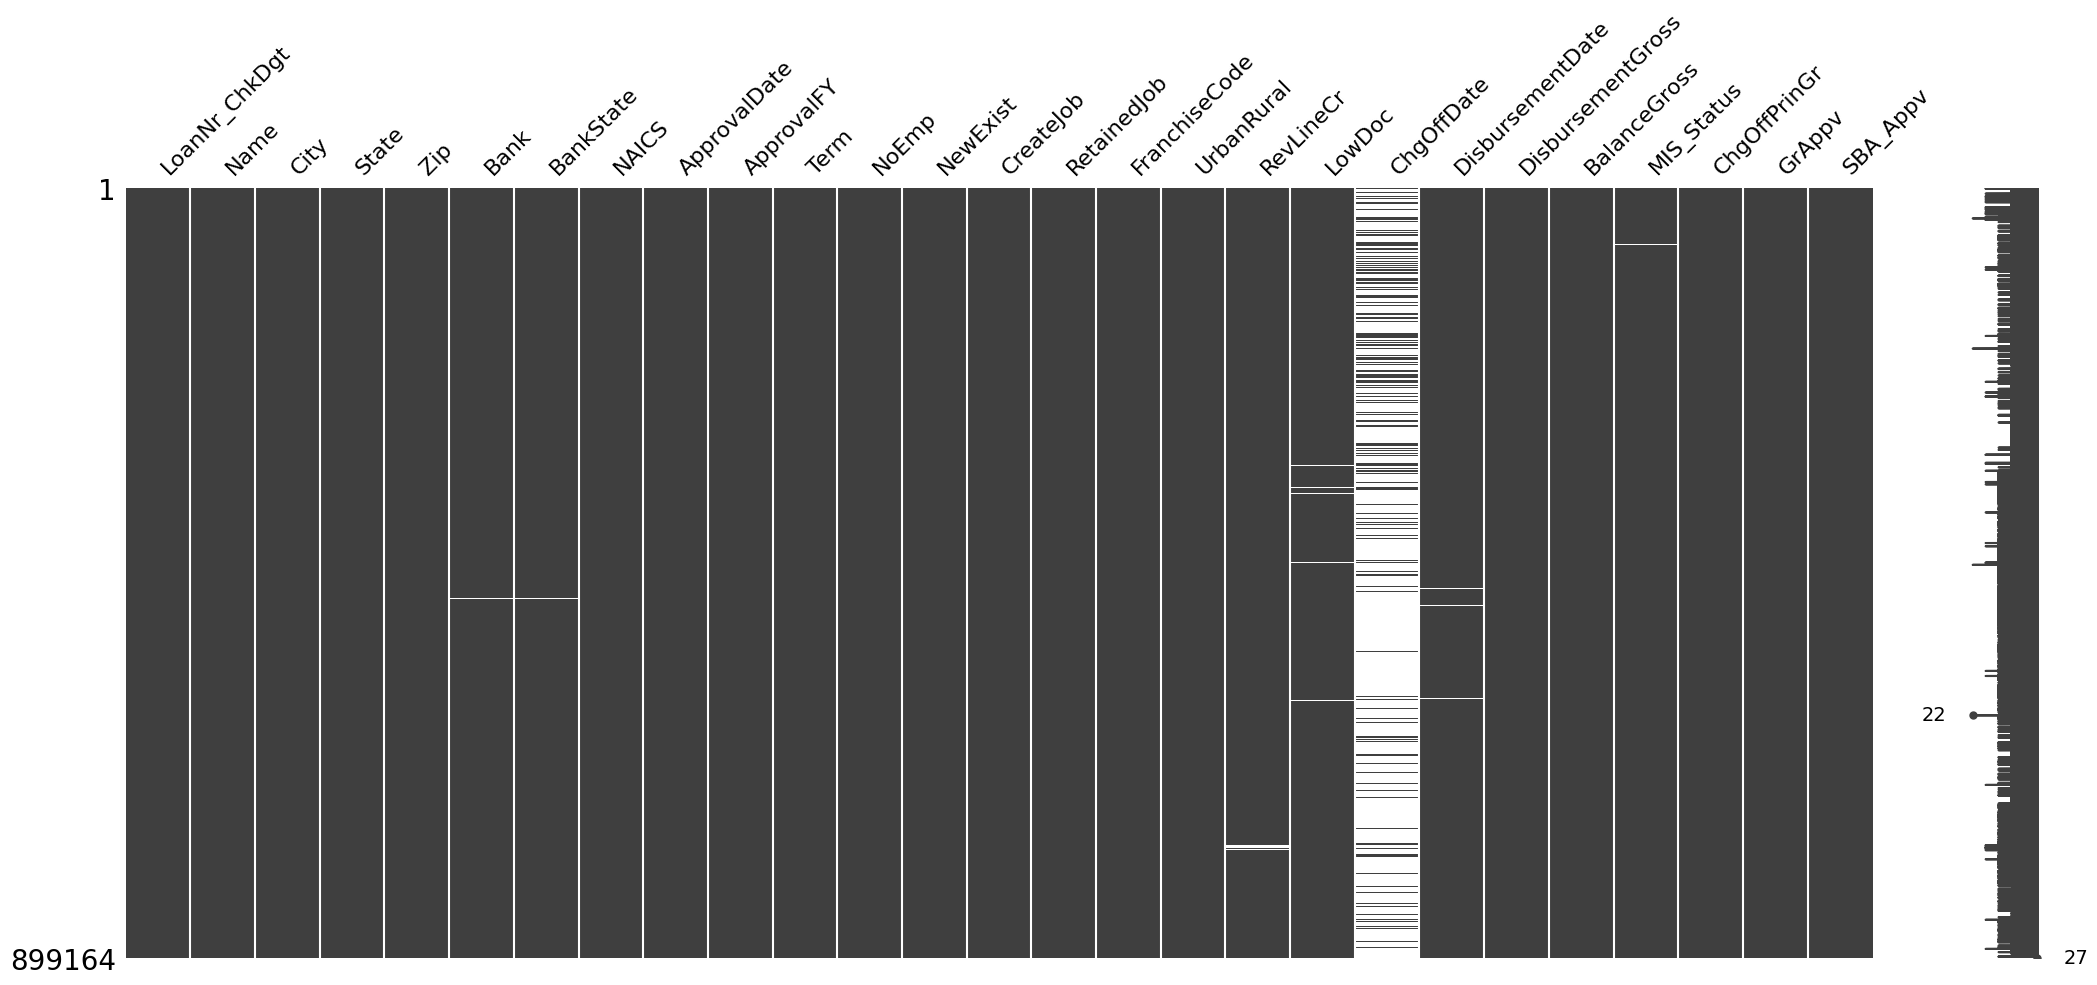

In [7]:
msno.matrix(donnees)

In [8]:
donnees.isna().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

# valeurs uniques des variables

In [9]:
print("nombre MIS_Status : ", donnees["MIS_Status"].unique().shape, donnees["MIS_Status"].unique())
print("nombre noms : ", donnees["Name"].unique().shape)
print("nombre de villes : ", donnees["City"].unique().shape)
print("nombre d'états : ", donnees["State"].unique().shape)
print("nombre de zip codes : ", donnees["Zip"].unique().shape)
print("nombre de valeurs urbanRural : ", donnees["UrbanRural"].unique().shape, donnees["UrbanRural"].unique())
print("nombre de banques : ", donnees["Bank"].unique().shape)
print("nombre de RetainedJob : ", donnees["RetainedJob"].unique().shape)
print("nombre de NAICS : ", donnees["NAICS"].unique().shape)
print("nombre de RevLineCr : ", donnees["RevLineCr"].unique().shape, donnees["RevLineCr"].unique())

naics_2_digits = donnees["NAICS"].astype(str).str[:2]
print("nombre de NAICS 2 premiers chiffres : ", naics_2_digits.unique().shape, naics_2_digits.unique())
print("nombre de valeurs dans NewExist : ", donnees["NewExist"].unique().shape, donnees["NewExist"].unique())


nombre MIS_Status :  (3,) ['P I F' 'CHGOFF' nan]
nombre noms :  (779584,)
nombre de villes :  (32582,)
nombre d'états :  (52,)
nombre de zip codes :  (33611,)
nombre de valeurs urbanRural :  (3,) [0 1 2]
nombre de banques :  (5803,)
nombre de RetainedJob :  (358,)
nombre de NAICS :  (1312,)
nombre de RevLineCr :  (19,) ['N' '0' 'Y' 'T' nan '`' ',' '1' 'C' '3' '2' 'R' '7' 'A' '5' '.' '4' '-'
 'Q']
nombre de NAICS 2 premiers chiffres :  (25,) ['45' '72' '62' '0' '33' '81' '23' '44' '42' '61' '53' '54' '31' '51' '71'
 '52' '21' '32' '56' '48' '11' '92' '22' '49' '55']
nombre de valeurs dans NewExist :  (4,) [ 2.  1.  0. nan]


In [10]:
print("Nombre de lignes avec NAICS = 0")
donnees[donnees["NAICS"] == 0].shape[0]

Nombre de lignes avec NAICS = 0


201948

In [11]:
# traitement de la date :
donnees['ApprovalDate'] = donnees['ApprovalDate'].map(
    lambda x: x.replace(x[-3:], '-19' + x[-2:]) if int(x[-2:]) >= 50 else x.replace(x[-3:], '-20' + x[-2:])
)
donnees['ApprovalDate'] = pd.to_datetime(donnees['ApprovalDate'])

# traitement valeurs nulles : 
- pour la target "MIS_Status" -> si ChgOffPrinGr (Montant du prêt déclaré en défaut (non remboursé).) == 0 donc MIS_Status = PIF sinon CHGOFF ✅
  - utiliser ChgOffDate car la corrélation est forte 0.98 
  
- pour "state" : essayer de déterminer le state à partir de la ville "city" ou du code postal "Zip"     ✅
  - créer 2 dictionnaires des City et Zip : city et zip comme clés pour chaque dictionnaire et le state comme valeur
  - déterminer les états manquants grace à ces 2 dictionnaires
  
- pour LowDoc : si le prêt est faible (GrAppv) (<$150,000) et après 1993, LowDoc = "Y" sinon non :      ✅
  - transformer les valeurs (0, 1, A, C, R, S)en null ;
    - GrvAppv < 150000 et année > 1993
  - donnees['LowDoc'] = np.where((donnees['GrAppv'] < 150000) & (donnees['ApprovalFY'] > 1990), 'Y', 'N')

  
- pour NewExists : on se base sur RetainedJob, on suppose que si l'entreprise va sauver des postes ça veut dire qu'elle existe déja. sinon utiliser le mode ✅
  - L'article fait la distinction entre deux choses différentes :
    - La variable originale NewExist dans le dataset :

      1 = Existing Business (entreprise existante > 2 ans)
      2 = New Business (nouvelle entreprise ≤ 2 ans)
      0 = Erreur de codage

    - Une nouvelle variable dummy "New" créée pour la régression logistique :

      Dummy New = 1 si l'entreprise a ≤ 2 ans
      Dummy New = 0 si l'entreprise a > 2 ans
      
  - On propose une approche qui consiste à remplacer les 0 par des 1
  - on remplace les 136 NaN par le mode

- pour RevLineCr : remplacer par le mode ? donnees['RevLineCr'] = donnees['RevLineCr'].fillna(donnees['RevLineCr'].mode()[0])
  - On remplace les valeurs invalides par des NaN :
    - donnees['RevLineCr'] = donnees['RevLineCr'].replace(['0', 'T', '1', 'R', '`', '2', 'C', ',', '3', '7', 'A', '5', '.', '4', '-', 'Q'], np.nan)
  - on se base sur le montant total du pret GrAppv, le montant total du prêt versé DisbursementGross pour déterminer les valeurs NaN ?  ✅

### remplacement :
- on remplace franchise code par un booléen : 0 pas de franchise, 1 franchise


# -----------------------------------------------------------------------


# Convertir les variables Objet (numériques) et int ou float
- ApprovalFY
- LowDoc
- DisbursementGross     Prix
- BalanceGross          Prix
- ChgOffPrinGr          Prix
- GrAppv                Prix
- SBA_Appv              Prix


In [12]:
donnees[["ApprovalFY", "LowDoc", "DisbursementGross", "BalanceGross", "ChgOffPrinGr", "GrAppv", "SBA_Appv", "ApprovalDate"]].dtypes

ApprovalFY                   object
LowDoc                       object
DisbursementGross            object
BalanceGross                 object
ChgOffPrinGr                 object
GrAppv                       object
SBA_Appv                     object
ApprovalDate         datetime64[ns]
dtype: object

In [13]:
donnees["ApprovalFY"].unique()

array([1997, 1980, 2006, 1998, 1999, 2000, 2001, 1972, 2003, 2004, 1978,
       1979, 1981, 2005, 1962, 1982, 1965, 1966, 1983, 1973, 1984, 2007,
       1985, 1986, 1987, 2008, 1988, 2009, 1989, 1991, 1990, 1974, 2010,
       1967, 2011, 1992, 1993, 2002, 2012, 2013, 1994, 2014, 1975, 1977,
       1976, 1968, '2004', '1994', '1979', '1976', '1967', '1975', '1974',
       '1977', '1981', '1982', '1983', '1984', '1978', '1980', '1968',
       '1976A', '1969', '1995', '1970', '2005', '1996', '1971', 1996,
       1971], dtype=object)

In [14]:
# colonne année
donnees["ApprovalFY"] = donnees["ApprovalFY"].astype(str).str.replace('A', '').astype(int)

# colonnes monétaires
for colonne in ["DisbursementGross", "BalanceGross", "ChgOffPrinGr", "GrAppv", "SBA_Appv"] :
    donnees[colonne] = donnees[colonne].str.replace('$', '').str.replace(',', '').astype(float)

# colonne LowDoc
# donnees["LowDoc"] = np.where((donnees["GrAppv"] < 150000) & (donnees["ApprovalFY"] > 1993), "Y", "N")
# donnees["LowDoc"] = donnees["LowDoc"].replace({"Y" : 1, "N" : 0})


In [15]:
donnees[["ApprovalFY", "LowDoc", "DisbursementGross", "BalanceGross", "ChgOffPrinGr", "GrAppv", "SBA_Appv"]].dtypes

ApprovalFY             int64
LowDoc                object
DisbursementGross    float64
BalanceGross         float64
ChgOffPrinGr         float64
GrAppv               float64
SBA_Appv             float64
dtype: object

In [16]:
donnees.dtypes

LoanNr_ChkDgt                 int64
Name                         object
City                         object
State                        object
Zip                           int64
Bank                         object
BankState                    object
NAICS                         int64
ApprovalDate         datetime64[ns]
ApprovalFY                    int64
Term                          int64
NoEmp                         int64
NewExist                    float64
CreateJob                     int64
RetainedJob                   int64
FranchiseCode                 int64
UrbanRural                    int64
RevLineCr                    object
LowDoc                       object
ChgOffDate                   object
DisbursementDate             object
DisbursementGross           float64
BalanceGross                float64
MIS_Status                   object
ChgOffPrinGr                float64
GrAppv                      float64
SBA_Appv                    float64
dtype: object

In [17]:
# imputing, iterative imputing ?

# Variable MIS_Status (target) : 

In [18]:
# corrélation entre chgoff_date et la target MIS_Status

donnees["has_chgoff_date"] = np.where(donnees["ChgOffDate"].isna(), 0, 1)
donnees["default"] = np.where(donnees["MIS_Status"] == "CHGOFF", 1, 0)

correlation = donnees["has_chgoff_date"].corr(donnees["default"])
print("corrélation entre ChgOffDate et MIS_Status:", correlation)
donnees.drop("default", inplace=True, axis=1)

corrélation entre ChgOffDate et MIS_Status: 0.9803000529416798


Forte corrélation de plus de 0.98 --> on se base sur la variable ChgOffDate pour remplacer les valeurs nulles

In [19]:
# donnees["MIS_Status"] = np.where(donnees["ChgOffDate"].notna(), "CHGOFF", "PIF")

donnees["MIS_Status"] = np.where(donnees["MIS_Status"].isna() & donnees["ChgOffDate"].notna(), "CHGOFF", donnees["MIS_Status"])
donnees["MIS_Status"] = np.where(donnees["MIS_Status"].isna() & donnees["ChgOffDate"].isna(), "P I F", donnees["MIS_Status"])

In [20]:
donnees["MIS_Status"].unique()

array(['P I F', 'CHGOFF'], dtype=object)

# Variable NewExist : 

In [21]:
donnees["NewExist"].value_counts()

NewExist
1.0    644869
2.0    253125
0.0      1034
Name: count, dtype: int64

In [22]:
# correlation entre Newexist et RetainedJob
donnees["bool_RetainedJob"] = np.where(donnees["RetainedJob"] > 0, 1, 0)
donnees["bool_CreateJob"] = np.where(donnees["CreateJob"] > 0, 1, 0)
donnees["NewExist"] = donnees["NewExist"].map({2.0: 0, 1.0: 1, 0.0: 0})

correlations = donnees[["NewExist", "bool_RetainedJob", "bool_CreateJob"]].corr()["NewExist"]
print("Corrélations :", correlations)

Corrélations : NewExist            1.000000
bool_RetainedJob    0.110438
bool_CreateJob     -0.043070
Name: NewExist, dtype: float64


In [23]:
donnees["NewExist"].value_counts()

NewExist
1.0    644869
0.0    254159
Name: count, dtype: int64

Notre hypothèse est qu'il ya une corrélation entre RetainedJob (le nombre de jobs sauvés) et la variable NewExist
On regarde s'il existe une correlation

La corrélation est faible 0.110240 avec RetainedJob et -0.043147 avec CreateJob 
- Notre hypothèse n'est pas valide

On va procéder ainsi : 
- NewExist = 0 → il sera = 0 (Existing Business)
- on remplace les 136 valeurs nulles par le mode 


In [24]:
print("NewExist = 0 :", donnees[donnees["NewExist"] == 0].shape[0])
print("NewExist = 1 :", donnees[donnees["NewExist"] == 1].shape[0])
print("NewExist = 2 :", donnees[donnees["NewExist"] == 2].shape[0])

NewExist = 0 : 254159
NewExist = 1 : 644869
NewExist = 2 : 0


In [25]:
mode_NewExist = donnees["NewExist"].mode()[0]
donnees["NewExist"] = donnees["NewExist"].fillna(mode_NewExist)

# variable State

In [26]:
donnees.isna().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                  0
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status                0
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
has_chgoff_date           0
bool_RetainedJob          0
bool_CreateJob            0
dtype: int64

In [27]:
# Trier le DataFrame par "Code Postal" dans l'ordre croissant.
donnees_sorted = donnees.sort_values(by="Zip")

# Grouper le DataFrame par "Code Postal".
grouped = donnees_sorted.groupby("Zip")

# Remplir les valeurs nulles de "State" avec la valeur "State" non nulle correspondante dans chaque groupe.
donnees_sorted["State"] = grouped["State"].fillna(method="ffill")
donnees = donnees_sorted.sort_index()

In [28]:
donnees.loc[donnees['State'].isnull()]

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,has_chgoff_date,bool_RetainedJob,bool_CreateJob
306274,3113583009,THE COMPUTER EDGE,"BOX 267, APO AP",NaN,96205,RTC/WESTPORT SAVINGS BANK,CA,541511,1988-01-21,1988,73,8,1.0,0,0,0,0,N,N,18-Sep-93,16-Mar-88,50000.0,0.0,CHGOFF,30589.0,50000.0,45000.0,1,0,0


In [29]:
# On remplace les 2 valeurs nulles restantes de State par le BankState
# donnees[donnees["City"] == "LAKE OZARK"]
donnees["State"].fillna(donnees["BankState"], inplace=True)

In [30]:
donnees['State'].isnull().sum()

0

# variable LowDoc

In [31]:
donnees["LowDoc"].isna().sum()

2582

In [32]:
donnees["LowDoc"] = np.where((donnees["LowDoc"].isna()) | (~donnees["LowDoc"].isin(['Y', 'N'])),np.where((donnees["GrAppv"] < 150000) & (donnees["ApprovalFY"] > 1993), "Y", "N"),donnees["LowDoc"])


In [33]:
donnees["LowDoc"].isna().sum()

0

In [34]:
donnees["LowDoc"].unique()

array(['Y', 'N'], dtype=object)

# variable RevLineCr

In [35]:
donnees["RevLineCr"].unique()

array(['N', '0', 'Y', 'T', nan, '`', ',', '1', 'C', '3', '2', 'R', '7',
       'A', '5', '.', '4', '-', 'Q'], dtype=object)

In [36]:
donnees.loc[(donnees["RevLineCr"] != "Y") & (donnees["RevLineCr"] != "N"), "RevLineCr"] = np.nan

In [37]:
donnees[(donnees["RevLineCr"] == "Y") | (donnees["RevLineCr"] == "N")].shape

(621685, 30)

### essayer de trouver une logique pour remplacer les valeurs incorrectes dans RevLineCr ? sinon supprimer cette variable

# créer colonne recession ou pas (booléen)

In [38]:
donnees["ApprovalDate"] = pd.to_datetime(donnees["ApprovalDate"])

In [39]:
donnees['Recession'] = np.where(  
    (donnees['DisbursementDate'] >= '2007-12-01') |  
    (donnees['DisbursementDate'] <= '2009-06-30'),  
    1, 0)

In [40]:
donnees["Recession"].unique()

array([1, 0])

# variable City

In [41]:
# nom d'une ville au meme zip sinon unknown
donnees['City'] = donnees.groupby('Zip')['City'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

# variable Bank

In [42]:
# unknown pour les banques inconnues
donnees['Bank'] = donnees['Bank'].fillna('Unknown')

# variable BankState

In [43]:
# nom de l'état de l'emprunteur pour le bankState
donnees['BankState'] = donnees['BankState'].fillna(donnees['State'])

# copie du dataframe nettoyé - sauvegarde en CSV

In [44]:
df_nettoye = donnees.copy()
df_nettoye.to_csv("dataframe_nettoye.csv", index=False)

In [45]:
df_nettoye.isna().sum()

LoanNr_ChkDgt             0
Name                     14
City                      0
State                     0
Zip                       0
Bank                      0
BankState                 0
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                  0
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr            277479
LowDoc                    0
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status                0
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
has_chgoff_date           0
bool_RetainedJob          0
bool_CreateJob            0
Recession                 0
dtype: int64

### suppression des variables qui ne seront pas utilisées pour le traitement

In [46]:
donnees.drop(["LoanNr_ChkDgt", "Name", "City", "Zip", "Bank", "BankState", "ApprovalDate", "RevLineCr", "ChgOffDate", "DisbursementDate", "BalanceGross", "ChgOffPrinGr", "SBA_Appv"], axis=1, inplace=True)

donnees["bool_RetainedJob"] = np.where(donnees["RetainedJob"] > 0, 1, 0)
donnees["bool_CreateJob"] = np.where(donnees["CreateJob"] > 0, 1, 0)

donnees.isna().sum()

State                0
NAICS                0
ApprovalFY           0
Term                 0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
LowDoc               0
DisbursementGross    0
MIS_Status           0
GrAppv               0
has_chgoff_date      0
bool_RetainedJob     0
bool_CreateJob       0
Recession            0
dtype: int64

In [47]:
donnees.dtypes

State                 object
NAICS                  int64
ApprovalFY             int64
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
LowDoc                object
DisbursementGross    float64
MIS_Status            object
GrAppv               float64
has_chgoff_date        int64
bool_RetainedJob       int64
bool_CreateJob         int64
Recession              int64
dtype: object

## encodage manuel

In [48]:
donnees.loc[donnees["MIS_Status"] == "CHGOFF", "MIS_Status"] = 0 
donnees.loc[donnees["MIS_Status"] == "P I F", "MIS_Status"] = 1 
donnees["MIS_Status"] = donnees["MIS_Status"].astype(int) 


In [49]:
donnees.loc[donnees["MIS_Status"] == "P I F", "MIS_Status"] = 1
donnees.loc[donnees["MIS_Status"] == "P I F", "MIS_Status"]

Series([], Name: MIS_Status, dtype: int64)

In [50]:
donnees["MIS_Status"].unique()
donnees.head()

,State,NAICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,LowDoc,DisbursementGross,MIS_Status,GrAppv,has_chgoff_date,bool_RetainedJob,bool_CreateJob,Recession
0,IN,451120,1997,84,4,0.0,0,0,1,0,Y,60000.0,1,60000.0,0,0,0,1
1,IN,722410,1997,60,2,0.0,0,0,1,0,Y,40000.0,1,40000.0,0,0,0,1
2,IN,621210,1997,180,7,1.0,0,0,1,0,N,287000.0,1,287000.0,0,0,0,1
3,OK,0,1997,60,2,1.0,0,0,1,0,Y,35000.0,1,35000.0,0,0,0,1
4,FL,0,1997,240,14,1.0,7,7,1,0,N,229000.0,1,229000.0,0,1,1,1


In [51]:
donnees.isna().sum()

State                0
NAICS                0
ApprovalFY           0
Term                 0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
LowDoc               0
DisbursementGross    0
MIS_Status           0
GrAppv               0
has_chgoff_date      0
bool_RetainedJob     0
bool_CreateJob       0
Recession            0
dtype: int64

In [52]:
donnees.dtypes

State                 object
NAICS                  int64
ApprovalFY             int64
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
LowDoc                object
DisbursementGross    float64
MIS_Status             int64
GrAppv               float64
has_chgoff_date        int64
bool_RetainedJob       int64
bool_CreateJob         int64
Recession              int64
dtype: object

# variable NAICS, garder les 2 premiers chiffres

In [53]:
donnees["NAICS"] = donnees["NAICS"].astype(str).str[:2].astype(int)


In [54]:
donnees["NAICS"].unique()

array([45, 72, 62,  0, 33, 81, 23, 44, 42, 61, 53, 54, 31, 51, 71, 52, 21,
       32, 56, 48, 11, 92, 22, 49, 55])

# colonne FranchiseCode

In [55]:
# donnees["FranchiseCode"].dtype
# donnees["FranchiseCode"].unique()
donnees["FranchiseCode"].isna().sum()
donnees.loc[(donnees["FranchiseCode"] != 0) & (donnees["FranchiseCode"] != 1), "FranchiseCode"] = "N"
donnees.loc[(donnees["FranchiseCode"] == 0) | (donnees["FranchiseCode"] == 1), "FranchiseCode"] = "Y"
donnees["FranchiseCode"].unique()

array(['Y', 'N'], dtype=object)

In [56]:
donnees["is_franchise"] = np.where(donnees["FranchiseCode"] == "Y", 1, 0)
donnees.drop("FranchiseCode", inplace=True, axis=1)

# Corrélations

In [57]:
donnees["NewExist"].unique()

array([0., 1.])

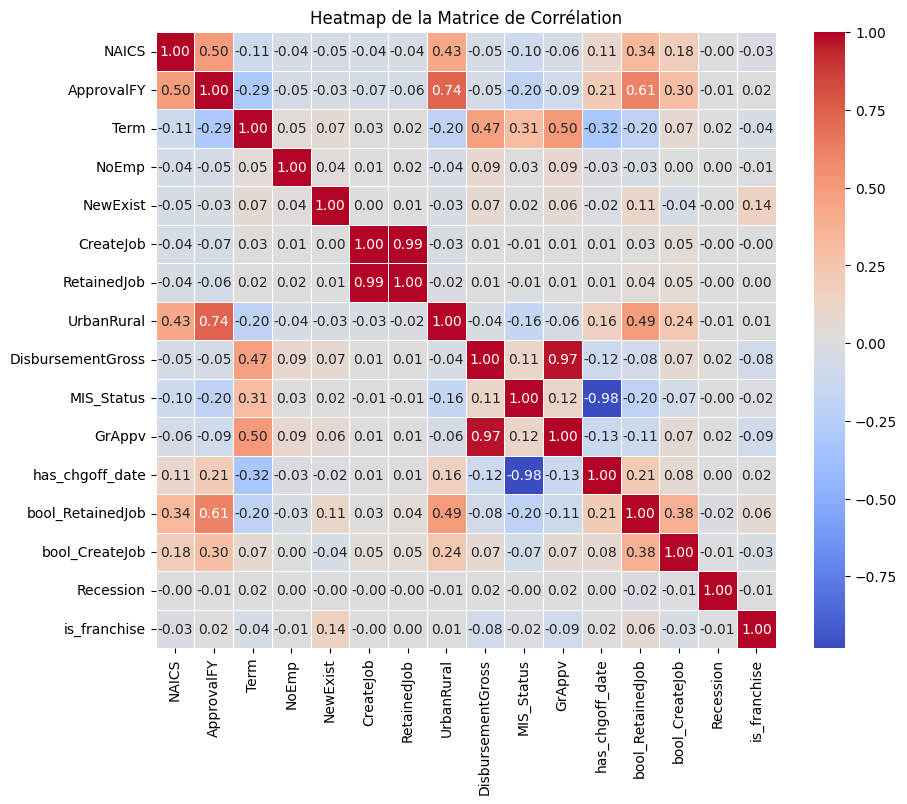

In [58]:
# donnees.drop(["State", "LowDoc"], axis=1).corr()

import seaborn as sns
import matplotlib.pyplot as plt

# Calcul de la matrice de corrélation sans "State" et "LowDoc"
correlation_matrix = donnees.drop(["State", "LowDoc"], axis=1).corr()

# Affichage de la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap de la Matrice de Corrélation")
plt.show()


In [59]:
donnees["NewExist"].value_counts()

NewExist
1.0    645005
0.0    254159
Name: count, dtype: int64

# Modélisation

## LogisticRegression

In [60]:
# 1. Import des bibliothèques nécessaires
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
donnees.drop(["has_chgoff_date"], inplace=True, axis=1)
# Séparation des variables catégorielles et numériques
cat_columns = ["State", "LowDoc"]
num_columns = ["NAICS", "ApprovalFY", "Term", "NoEmp", "NewExist", "CreateJob", "RetainedJob", "FranchiseCode", "UrbanRural", "DisbursementGross", "GrAppv", "SBA_Appv"]

# Encodage des variables catégorielles
donnees_encod = pd.get_dummies(donnees, columns=cat_columns)

# Séparation features/target
X = donnees_encod.drop("MIS_Status", axis=1)
y = donnees_encod["MIS_Status"]

In [62]:
donnees_encod.shape

(899164, 68)

In [63]:
# Division train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

# Standardisation des features numériques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [64]:
X.isna().sum()

NAICS         0
ApprovalFY    0
Term          0
NoEmp         0
NewExist      0
             ..
State_WI      0
State_WV      0
State_WY      0
LowDoc_N      0
LowDoc_Y      0
Length: 67, dtype: int64

In [65]:
# Création et entraînement du modèle
model = LogisticRegression(random_state=42, max_iter=1000, solver='lbfgs')
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [66]:
# Prédictions
y_pred = model.predict(X_test_scaled)

# Métriques d'évaluation
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

f1_macro = f1_score(y_test, y_pred, average='macro')
print(f"F1-score macro : {f1_macro}")

matrice_confusion = confusion_matrix(y_test, y_pred)
matrice = matrice_confusion.astype('float')
print("\nmatrice de confusion :")
print(matrice)

Accuracy Score: 0.8455130842888442

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.24      0.35     15782
           1       0.86      0.98      0.91     74135

    accuracy                           0.85     89917
   macro avg       0.76      0.61      0.63     89917
weighted avg       0.82      0.85      0.81     89917

F1-score macro : 0.631143224067893

matrice de confusion :
[[ 3739. 12043.]
 [ 1848. 72287.]]


In [67]:
# Importance des features
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': abs(model.coef_[0])
})
feature_importance = feature_importance.sort_values('importance', ascending=False)
# plt.figure(figsize=(10, 6))
# sns.barplot(x='importance', y='feature', data=feature_importance)
# plt.title('Top 10 des features les plus importantes')
# plt.show()

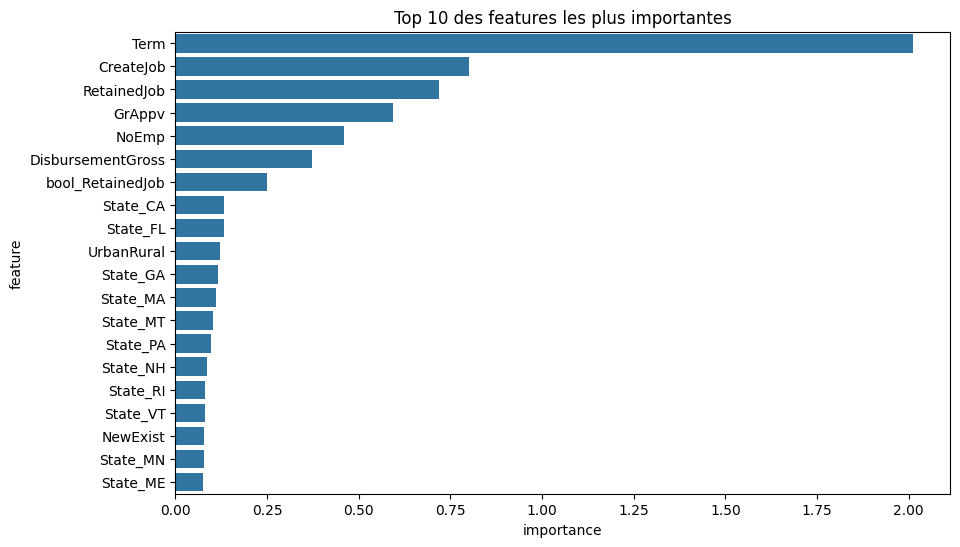

In [68]:
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(20))
plt.title('Top 10 des features les plus importantes')
plt.show()

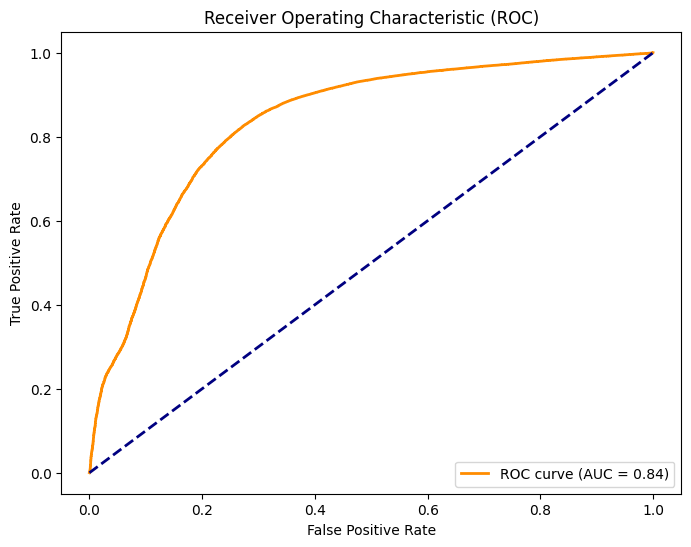

In [69]:
# Courbe ROC
from sklearn.metrics import roc_curve, auc
y_pred_proba = model.predict_proba(X_test_scaled)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# pipeline
- `State` : one hot ou get dummies ?
- `NAICS` : extraire seulement les 2 premiers chiffres
- `FranchiseCode` : booléen                                         label_binarizer
- `LowDoc` : transformer en booléen                                 label_binarizer
- `MIS_Status` : TARGET - transformer en booléen                    label_binarizer

In [70]:
df = df_nettoye.copy()
df.drop(["LoanNr_ChkDgt", "Name", "City", "Zip", "Bank", "BankState", "ApprovalDate", "RevLineCr", "ChgOffDate", "DisbursementDate", "BalanceGross", "ChgOffPrinGr", "SBA_Appv", 'has_chgoff_date'], axis=1, inplace=True)
# df.drop(["LoanNr_ChkDgt", "Name", "ApprovalDate", "RevLineCr", "ChgOffDate", "DisbursementDate", "BalanceGross", "ChgOffPrinGr", "SBA_Appv"], axis=1, inplace=True)
df.dtypes
df.head()

,State,NAICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,LowDoc,DisbursementGross,MIS_Status,GrAppv,bool_RetainedJob,bool_CreateJob,Recession
0,IN,451120,1997,84,4,0.0,0,0,1,0,Y,60000.0,P I F,60000.0,0,0,1
1,IN,722410,1997,60,2,0.0,0,0,1,0,Y,40000.0,P I F,40000.0,0,0,1
2,IN,621210,1997,180,7,1.0,0,0,1,0,N,287000.0,P I F,287000.0,0,0,1
3,OK,0,1997,60,2,1.0,0,0,1,0,Y,35000.0,P I F,35000.0,0,0,1
4,FL,0,1997,240,14,1.0,7,7,1,0,N,229000.0,P I F,229000.0,1,1,1


### Pipeline complete

In [71]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, StandardScaler, RobustScaler


df = df_nettoye.copy()

df["MIS_Status"] = df["MIS_Status"].map({"CHGOFF": 0, "P I F": 1})
df["NewExist"] = df["NewExist"].map({2 : 0, 1 : 1})
df["LowDoc"] = df["LowDoc"].map({"Y" : 1, "N" : 0})

features = ["City", "State", "Zip", "Bank", "BankState", "NAICS", "ApprovalFY", "Term", "NoEmp", "NewExist", "CreateJob", "RetainedJob", "FranchiseCode", "UrbanRural", "LowDoc", "DisbursementGross","GrAppv", "SBA_Appv", "bool_RetainedJob",  "bool_CreateJob", "Recession"]

X = df[features]
y = df['MIS_Status']

num_col = ['ApprovalFY', 'Term', 'NoEmp', 'CreateJob', 'RetainedJob', 'DisbursementGross', 'GrAppv']


numeric_transformer = Pipeline([
    # ('scaler', RobustScaler())])
    ('scaler', StandardScaler())])

def transform_naics(X):
    return X['NAICS'].astype(str).str[:2].astype(int).values.reshape(-1, 1)

def transform_franchise(X):
    return X['FranchiseCode'].apply(lambda y: 1 if y in [0, 1] else 0).values.reshape(-1, 1)

# preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("naics_2_nb", FunctionTransformer(transform_naics), ['NAICS']),
        ("franchise_transform", FunctionTransformer(transform_franchise), ['FranchiseCode']),
        ('num', numeric_transformer, num_col),
    ],
    remainder='drop')

# pipeline
def creer_pipeline(model) :
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    return pipeline


### fonctions pour les metriques et la courbe AUC

In [72]:
# métriques
def metriques(pipeline, X_test, y_test) :
    y_pred = pipeline.predict(X_test)
    
    # Métriques d'évaluation
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    f1_macro = f1_score(y_test, y_pred, average='macro')
    print(f"F1-score macro : {f1_macro}")

    matrice_confusion = confusion_matrix(y_test, y_pred)
    matrice_percentage = matrice_confusion.astype('float') / matrice_confusion.sum(axis=1)[:, np.newaxis] * 100
    matrice_percentage
    
# courbe AUC
def courbe_AUC(pipeline, X_test, y_test) :
    from sklearn.metrics import roc_curve, auc
    y_pred_proba = pipeline.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()
    
def best_params_to_csv(random_search):
    nom_classifier = random_search.estimator.named_steps[list(random_search.estimator.named_steps.keys())[-1]].__class__.__name__
    params_top = pd.DataFrame([random_search.best_params_])
    params_top.to_csv(f"best_params_{nom_classifier}.csv", index=False)



In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)

## DecisionTreeClassifier

In [74]:
from sklearn.tree import DecisionTreeClassifier


# création pipeline :
model = DecisionTreeClassifier(random_state=42, criterion="gini", splitter="best", max_depth=15, min_samples_split=10, max_features=None)

pipeline1 = creer_pipeline(model)


In [75]:
# entrainement
pipeline1.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('naics_2_nb',
                                                  FunctionTransformer(func=<function transform_naics at 0x7f3cb0f69760>),
                                                  ['NAICS']),
                                                 ('franchise_transform',
                                                  FunctionTransformer(func=<function transform_franchise at 0x7f3cb50e2480>),
                                                  ['FranchiseCode']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['ApprovalFY', 'Term',
                                                   'NoEmp', 'CreateJob',
                                                   'RetainedJob',
                                                   'DisbursementGross',
                                                   'GrAppv'])])),
                ('classifier',
                 DecisionTreeClassifier(max_depth=15, min_samples_split=10,
                                        random_state=42))])

In [76]:
# métriques : 
metriques(pipeline1, X_test, y_test)

Accuracy Score: 0.9381723818350325

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.82     23673
           1       0.96      0.96      0.96    111202

    accuracy                           0.94    134875
   macro avg       0.89      0.89      0.89    134875
weighted avg       0.94      0.94      0.94    134875

F1-score macro : 0.8927650380208049


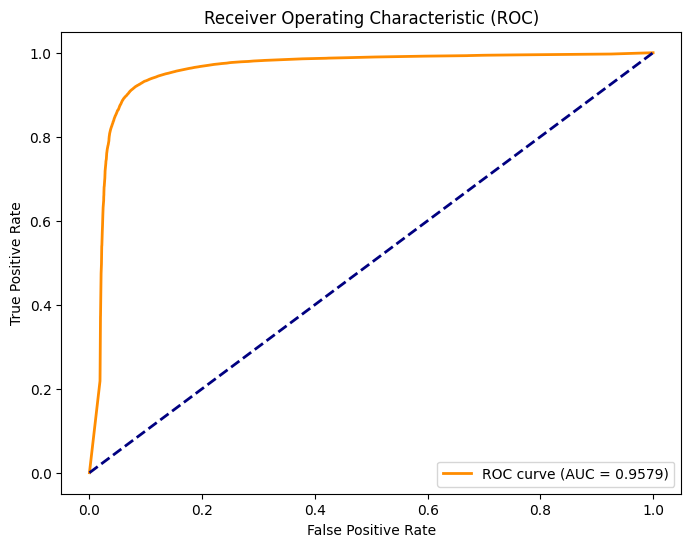

In [77]:
# courbe AUC
courbe_AUC(pipeline1, X_test, y_test)

### fine Tuning DecisionTreeClassifier

In [78]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


params = {
    # "classifier__criterion" :  ["entropy", "gini", "log_loss"], 
    # "classifier__splitter" : ["best", "random"], 
    "classifier__criterion" :  ["gini"], 
    "classifier__splitter" : ["best"], 
    "classifier__max_depth": np.arange(13, 18), 
    "classifier__min_samples_split" : np.arange(12, 15), 
    "classifier__min_samples_leaf" : np.arange(1, 5),
    "classifier__min_weight_fraction_leaf" : np.linspace(0,0.1,5),
    # "classifier__max_features" : ["sqrt", "log2", None],     # None est le meilleur paramètre car le modele teste toutes les options 
    "classifier__max_features" : [None],     # None est le meilleur paramètre car le modele teste toutes les options 
    "classifier__max_leaf_nodes" : np.arange(50, 70),       # définir le nombre max des feuilles de notre arbre
    "classifier__class_weight": ["balanced"], 
    # "classifier__class_weight": ["balanced", None], 
    "classifier__ccp_alpha" : np.linspace(0,0.01,5), 
}

model_base1 = DecisionTreeClassifier(random_state=42)

pipeline_t1 = creer_pipeline(model_base1)

random_search1 = RandomizedSearchCV(
    estimator=pipeline_t1,
    param_distributions = params,
    n_iter= 100,
    cv = 5,
    scoring=['accuracy', 'f1_macro', 'roc_auc'], 
    refit = 'f1_macro', 
    n_jobs = -1,
    random_state=42
)



In [ ]:
# entrainement
random_search1.fit(X_train, y_train)


In [ ]:
best_params_to_csv(random_search1)

print("meilleur score : ", random_search1.best_score_)

print("\nmeilleurs parametres \n")
for param, valeur in random_search1.best_params_.items() : 
    print(f"{param} : {valeur}")
    

meilleur score :  0.8466717109426171

meilleurs parametres 

classifier__splitter : best
classifier__min_weight_fraction_leaf : 0.0
classifier__min_samples_split : 13
classifier__min_samples_leaf : 4
classifier__max_leaf_nodes : 54
classifier__max_features : None
classifier__max_depth : 16
classifier__criterion : gini
classifier__class_weight : balanced
classifier__ccp_alpha : 0.0


In [ ]:
metriques(random_search1, X_test, y_test)

Accuracy Score: 0.8983799814643189

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.89      0.75     23673
           1       0.98      0.90      0.94    111202

    accuracy                           0.90    134875
   macro avg       0.81      0.90      0.85    134875
weighted avg       0.92      0.90      0.90    134875

F1-score macro : 0.8454215170984121


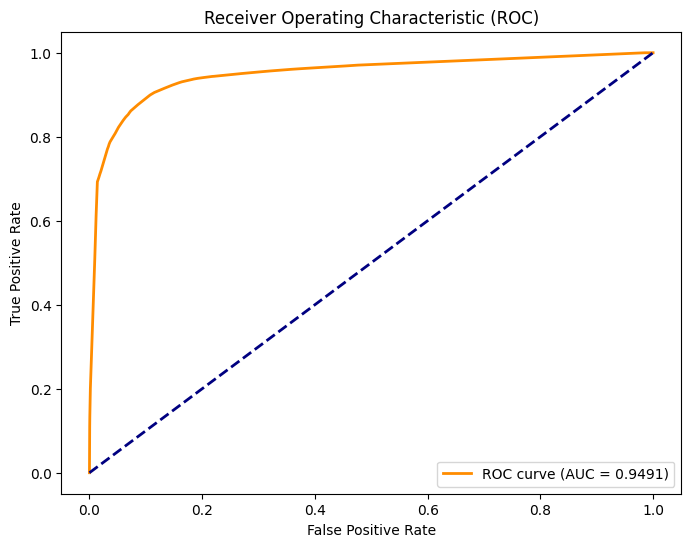

In [ ]:
courbe_AUC(random_search1, X_test, y_test)


In [ ]:
# 3. Faire une validation croisée sur le modèle fixe
from sklearn.model_selection import cross_val_score

meilleurs_params = {c.replace("classifier__", "") : v for c, v in random_search1.best_params_.items()}
meilleur_model1 = DecisionTreeClassifier(**meilleurs_params, random_state=42)

best_pipeline1 = creer_pipeline(meilleur_model1)

best_pipeline1.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('naics_2_nb',
                                                  FunctionTransformer(func=<function transform_naics at 0x0000020D94461120>),
                                                  ['NAICS']),
                                                 ('franchise_transform',
                                                  FunctionTransformer(func=<function transform_franchise at 0x0000020D944DFCE0>),
                                                  ['FranchiseCode']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['ApprovalFY', 'Term',
                                                   'NoEmp', 'CreateJob',
                                                   'RetainedJob',
                                                   'DisbursementGross',
                                                   'GrAppv'])])),
                ('classifier',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=16,
                                        max_leaf_nodes=54, min_samples_leaf=4,
                                        min_samples_split=13,
                                        random_state=42))])

In [ ]:
metriques(best_pipeline1, X_test, y_test)

Accuracy Score: 0.8983799814643189

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.89      0.75     23673
           1       0.98      0.90      0.94    111202

    accuracy                           0.90    134875
   macro avg       0.81      0.90      0.85    134875
weighted avg       0.92      0.90      0.90    134875

F1-score macro : 0.8454215170984121


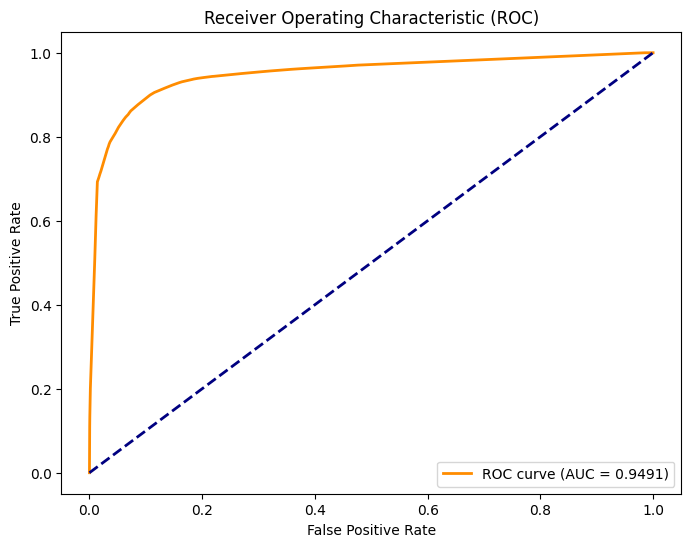

In [ ]:
courbe_AUC(best_pipeline1, X_test, y_test)

### features importance

In [ ]:
import shap

explainer = shap.TreeExplainer(best_pipeline1)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [ ]:
best_model_pipeline1 = best_pipeline1.named_steps["classifier"]
feature_importance = pd.DataFrame({
    'importance': best_model_pipeline1.feature_importances_})

feature_importance = feature_importance.sort_values(by="importance", ascending=False)

print(feature_importance)

   importance
3    0.840318
2    0.149228
8    0.009314
7    0.001140
0    0.000000
1    0.000000
4    0.000000
5    0.000000
6    0.000000


# XGBoost

In [83]:
import xgboost


model2 = xgboost.XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, scale_pos_weight=1, objective='binary:logistic', eval_metric=['auc', 'logloss'], random_state=42)
pipeline2 = creer_pipeline(model2)
    

In [84]:
pipeline2.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('naics_2_nb',
                                                  FunctionTransformer(func=<function transform_naics at 0x0000020D94461120>),
                                                  ['NAICS']),
                                                 ('franchise_transform',
                                                  FunctionTransformer(func=<function transform_franchise at 0x0000020D944DFCE0>),
                                                  ['FranchiseCode']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['ApprovalFY', 'Ter...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [85]:
metriques(pipeline2, X_test, y_test)

Accuracy Score: 0.9386543095458758

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.79      0.82     23673
           1       0.96      0.97      0.96    111202

    accuracy                           0.94    134875
   macro avg       0.90      0.88      0.89    134875
weighted avg       0.94      0.94      0.94    134875

F1-score macro : 0.8911277431771798


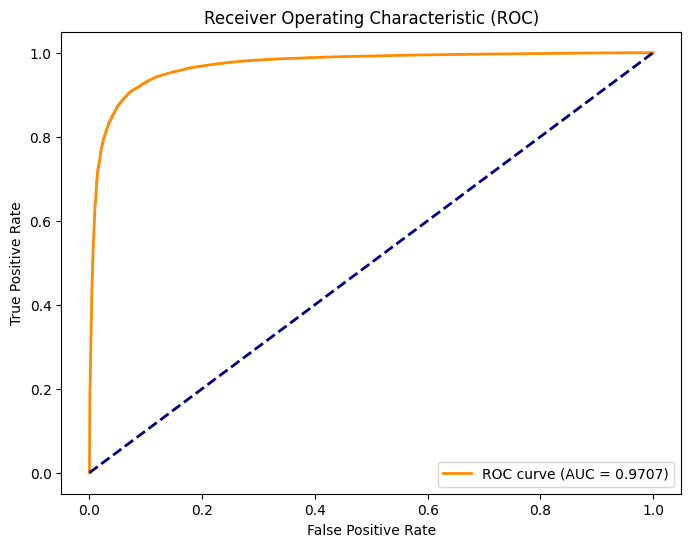

In [86]:
courbe_AUC(pipeline2, X_test, y_test)

### fine tuning de XGBoost

In [87]:
# calculer le rationde chaque valeur de la target, pour l'utiliser dans le tuning avec scale_pos_weight
print(y.value_counts(normalize=True))

MIS_Status
1    0.824483
0    0.175517
Name: proportion, dtype: float64


In [88]:
# Diviser X_train et y_train en sous-ensembles d'entraînement et de validation  
X_train_new, X_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42, stratify=y_train)

In [89]:
from sklearn.model_selection import RandomizedSearchCV

# Définir l'espace de recherche des paramètres
param_distributions = {
    'classifier__gamma': np.linspace(0, 0.5, 6),               # Réduction minimale de perte pour diviser un nœud. Plus élevé = moins de splits.   - 
    'classifier__max_depth': [3,4,5,6,7],                           # Profondeur maximale d'un arbre    - défaut 6
    'classifier__min_child_weight': [3,4,5,6,7],              # Somme minimale des poids nécessaires pour créer un nœud enfant.  - défaut 1
    'classifier__max_delta_step' : np.arange(1, 4),               # Limite maximale de changement des feuilles, utile pour classes déséquilibrées.  - defaut 0
    'classifier__subsample': np.linspace(0.6, 0.95, 8),         # Proportion d’échantillons utilisés par arbre. Réduit surapprentissage si <1.    - défaut 1
    'classifier__reg_lambda': [0,1,5,10],              # Contrôle la régularisation L2 pour éviter le surapprentissage.      - défaut  1
    'classifier__reg_alpha': [0, 0.1, 1, 5, 10],              # Contrôle la régularisation L1 pour simplifier et généraliser.    - défaut 0
    'classifier__scale_pos_weight': [0.1, 0.5, 1, 2, 5],
    # # 'classifier__scale_pos_weight': [0.175517 / 0.824483],        # Ajuste l'importance des classes pour datasets déséquilibrés.    - défaut 1
    'classifier__n_estimators': np.arange(200, 1001, 100),         # Nombre total d'arbres construits dans le modèle.    - défaut = 100
    'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2],       # Réduit la taille des mises à jour pour éviter le surajustement. - défaut = 0.3
    'classifier__colsample_bytree': np.linspace(0.6, 0.95, 8),     # Fraction de colonnes échantillonnées pour chaque arbre XGBoost.    - défaut 1
    'classifier__class_weight': ['balanced', None],
}


model_base2 = xgboost.XGBClassifier(  
#    device="cuda",        # "pour les gpu nvidia"
    verbosity=1,          # 0 pour ne pas afficher les messages 1 pour silencieux 2 pour afficher tout
    # objective='binary:logistic',  
    eval_metric=['auc'],  
    # eval_metric=['auc', 'logloss'],  
    random_state=42,  
    n_jobs=-1                  # Utiliser tous les cœurs CPU  
)
pipeline = creer_pipeline(model_base2)

# Configurer RandomizedSearchCV
random_search2 = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=100,  # Nombre d'itérations
    cv=5,        # Validation croisée à 5 plis
    scoring={  
            'accuracy': 'accuracy',  
            'f1_macro': 'f1_macro',  
            'roc_auc': 'roc_auc',  
            'precision': 'precision',  
            'recall': 'recall',  
            'cross_val': 'balanced_accuracy'        
        },    
    refit='f1_macro',  # Optimiser sur le f1_macro
    n_jobs=-1,    # Utiliser tous les cœurs disponibles
    random_state=42,
    verbose=1,
)


In [90]:
# Lancer la recherche
random_search2.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('naics_2_nb',
                                                                               FunctionTransformer(func=<function transform_naics at 0x0000020D94461120>),
                                                                               ['NAICS']),
                                                                              ('franchise_transform',
                                                                               FunctionTransformer(func=<function transform_franchise at 0x0000020D944DFCE0>),
                                                                               ['FranchiseCode']),
                                                                              ('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                Stan...
                                        'classifier__reg_alpha': [0, 0.1, 1, 5,
                                                                  10],
                                        'classifier__reg_lambda': [0, 1, 5, 10],
                                        'classifier__scale_pos_weight': [0.1,
                                                                         0.5, 1,
                                                                         2, 5],
                                        'classifier__subsample': array([0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])},
                   random_state=42, refit='f1_macro',
                   scoring={'accuracy': 'accuracy',
                            'cross_val': 'balanced_accuracy',
                            'f1_macro': 'f1_macro', 'precision': 'precision',
                            'recall': 'recall', 'roc_auc': 'roc_auc'},
                   verbose=1)

In [91]:
# fonction pour afficher les résultats des random search
def cv_scores(random_search):  
    # print("moyenne Cross-validation scores :", np.mean(random_search.cv_results_['mean_test_cross_val']))  
    print("moyenne Accuracy:", np.mean(random_search.cv_results_['mean_test_accuracy']))  
    print("moyenne F1-macro:", np.mean(random_search.cv_results_['mean_test_f1_macro']))  
    print("moyenne ROC-AUC:", np.mean(random_search.cv_results_['mean_test_roc_auc']))
    

In [92]:
cv_scores(random_search2) 

moyenne Accuracy: 0.9162530925013125
moyenne F1-macro: 0.8565835320414742
moyenne ROC-AUC: 0.9704869101688844


In [93]:
# Afficher les meilleurs paramètres et scores
best_params_to_csv(random_search2)

print("\nMeilleurs paramètres trouvés:")
for param, value in random_search2.best_params_.items():
    print(f"{param}: {value}")

print("\nMeilleurs scores:")
print(f"F1-macro: {random_search2.best_score_:.3f}")


Meilleurs paramètres trouvés:
classifier__subsample: 0.85
classifier__scale_pos_weight: 1
classifier__reg_lambda: 10
classifier__reg_alpha: 0
classifier__n_estimators: 1000
classifier__min_child_weight: 4
classifier__max_depth: 6
classifier__max_delta_step: 2
classifier__learning_rate: 0.05
classifier__gamma: 0.4
classifier__colsample_bytree: 0.75
classifier__class_weight: None

Meilleurs scores:
F1-macro: 0.900


In [94]:
# Créer le modèle final avec les meilleurs paramètres
meilleurs_params2 = {k.replace('classifier__', ''): v for k, v in random_search2.best_params_.items()}
meilleur_model2 = xgboost.XGBClassifier(
    **meilleurs_params2,
    objective='binary:logistic',
    eval_metric=['auc', 'logloss'],
    random_state=42
)

# Créer la pipeline finale
best_pipeline2 = creer_pipeline(meilleur_model2)


In [95]:
# une fois les meilleurs hyperparametres trouvée, on entraine le modele final : 
best_pipeline2.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('naics_2_nb',
                                                  FunctionTransformer(func=<function transform_naics at 0x0000020D94461120>),
                                                  ['NAICS']),
                                                 ('franchise_transform',
                                                  FunctionTransformer(func=<function transform_franchise at 0x0000020D944DFCE0>),
                                                  ['FranchiseCode']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['ApprovalFY', 'Ter...
                               feature_types=None, gamma=0.4, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=2,
                               max_depth=6, max_leaves=None, min_child_weight=4,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=1000,
                               n_jobs=None, num_parallel_tree=None, ...))])

In [96]:
# cv_scores = cross_val_score(best_pipeline2, X_train, y_train, cv=5, scoring='f1_macro')
metriques(best_pipeline2, X_test, y_test)

Accuracy Score: 0.9424355885078777

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83     23673
           1       0.96      0.97      0.97    111202

    accuracy                           0.94    134875
   macro avg       0.91      0.89      0.90    134875
weighted avg       0.94      0.94      0.94    134875

F1-score macro : 0.8986644567256997


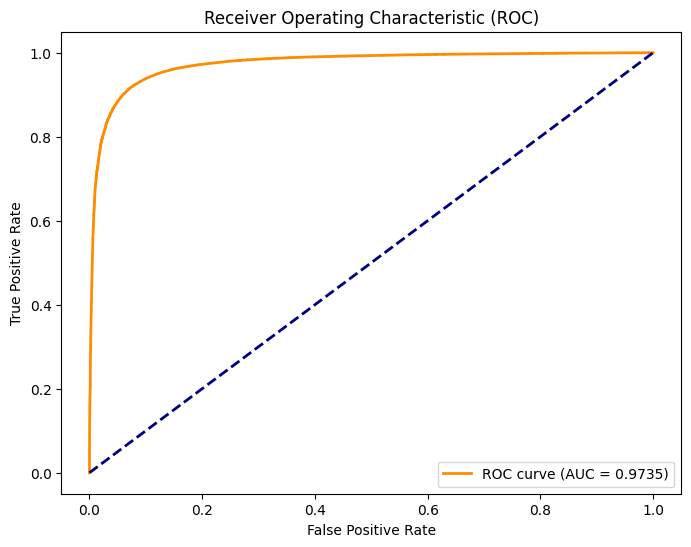

In [97]:
courbe_AUC(best_pipeline2, X_test, y_test)

# LightGBM

In [98]:
import lightgbm as lgb

params = {
    "boosting_type": "gbdt",
    "objective": "binary",
    "metric": ["binary_logloss", "auc"],
    "num_leaves": 31,
    "learning_rate": 0.05,
    "feature_fraction": 0.9,
    "bagging_fraction": 0.8,
    "bagging_freq": 5,
    "verbose": 0,
}

model3 = lgb.LGBMClassifier(**params)
pipeline3 = creer_pipeline(model3)


In [99]:
pipeline2.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('naics_2_nb',
                                                  FunctionTransformer(func=<function transform_naics at 0x0000020D94461120>),
                                                  ['NAICS']),
                                                 ('franchise_transform',
                                                  FunctionTransformer(func=<function transform_franchise at 0x0000020D944DFCE0>),
                                                  ['FranchiseCode']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['ApprovalFY', 'Ter...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [100]:
metriques(pipeline2, X_test, y_test)

Accuracy Score: 0.9386543095458758

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.79      0.82     23673
           1       0.96      0.97      0.96    111202

    accuracy                           0.94    134875
   macro avg       0.90      0.88      0.89    134875
weighted avg       0.94      0.94      0.94    134875

F1-score macro : 0.8911277431771798


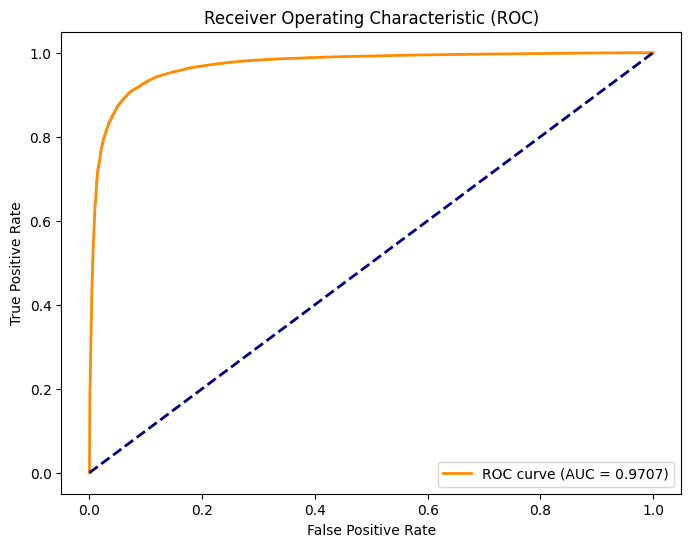

In [101]:
courbe_AUC(pipeline2, X_test, y_test)

### fine tuning de lightgbm

In [102]:
# import pickle
# pickle.dumps(pipeline) 

In [103]:
from sklearn.model_selection import RandomizedSearchCV

# Ajuster les param_distributions pour LightGBM
param_distributions = {
    # Paramètres de structure d'arbre
    'classifier__num_leaves': np.arange(20, 101, 20),          # Nombre maximum de feuilles dans un arbre, Contrôle la complexité du modèle
    'classifier__max_depth': np.arange(3, 10),                 # Profondeur maximale des arbres, -1 signifie pas de limite
    'classifier__min_data_in_leaf': np.arange(10, 50, 10),    # Nombre minimum d'observations dans chaque feuille, Aide à contrôler le surapprentissage
    # Paramètres de taux d'apprentissage
    'classifier__learning_rate': np.logspace(-3, 0, 6),       # Taux d'apprentissage qui réduit l'impact de chaque arbre
    'classifier__n_estimators': np.arange(100, 501, 100),     # Nombre total d'arbres de décision dans le modèle de boosting
    # Paramètres de régularisation
    'classifier__lambda_l1': np.linspace(0, 1.0, 5),          # Régularisation L1
    'classifier__lambda_l2': np.linspace(0, 1.0, 5),          # Régularisation L2
    # Paramètres de sous-échantillonnage
    'classifier__feature_fraction': np.linspace(0.6, 1.0, 5),  # Pourcentage de features sélectionnées aléatoirement pour chaque arbre.
    'classifier__bagging_fraction': np.linspace(0.6, 1.0, 5),  # Pourcentage d'observations utilisées pour entraîner chaque arbre.
    'classifier__bagging_freq': [0, 1, 5, 10],                 # Fréquence d'application du bagging pendant l'entraînement (0=désactivé).
    # Paramètres supplémentaires utiles
    'classifier__min_gain_to_split': [0, 0.1, 0.2, 0.3],       # Gain minimum nécessaire pour effectuer une division dans l'arbre.
    'classifier__max_bin': [255, 510],                          # Nombre maximum de divisions pour discrétiser les variables continues.
    'classifier__class_weight': ['balanced', None, {0:1, 1:2}, {0:1, 1:3}, {0:1, 1:5}]  # Poids attribués aux classes pour gérer le déséquilibre des données.
}

model_base3 = lgb.LGBMClassifier(
    objective='binary',
    metric=['auc', 'binary_logloss'],
    verbose=1,
    n_jobs=-1,
    random_state=42, 
    # class_weight='balanced'     # Poids attribués aux classes pour gérer le déséquilibre des données.
)


pipeline = creer_pipeline(model_base3)

# Configurer RandomizedSearchCV
random_search3 = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=50,  # Nombre d'itérations
    cv=3,        # Validation croisée à 5 plis
    scoring={  
            'accuracy': 'accuracy',  
            'f1_macro': 'f1_macro',  
            'roc_auc': 'roc_auc',  
            'precision': 'precision',  
            'recall': 'recall',  
            'balanced_accuracy': 'balanced_accuracy'        
        },    
    refit='f1_macro',  # Optimiser sur le f1_macro
    n_jobs=-1,    # Utiliser tous les cœurs disponibles
    random_state=42,
    verbose=1,
)


In [104]:
random_search3.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=0.2, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.2
[LightGBM] [Warning] lambda_l1 is set=0.75, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.75
[LightGBM] [Warning] lambda_l2 is set=1.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM]

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('naics_2_nb',
                                                                               FunctionTransformer(func=<function transform_naics at 0x0000020D94461120>),
                                                                               ['NAICS']),
                                                                              ('franchise_transform',
                                                                               FunctionTransformer(func=<function transform_franchise at 0x0000020D944DFCE0>),
                                                                               ['FranchiseCode']),
                                                                              ('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                Stan...
                                        'classifier__min_gain_to_split': [0,
                                                                          0.1,
                                                                          0.2,
                                                                          0.3],
                                        'classifier__n_estimators': array([100, 200, 300, 400, 500]),
                                        'classifier__num_leaves': array([ 20,  40,  60,  80, 100])},
                   random_state=42, refit='f1_macro',
                   scoring={'accuracy': 'accuracy',
                            'balanced_accuracy': 'balanced_accuracy',
                            'f1_macro': 'f1_macro', 'precision': 'precision',
                            'recall': 'recall', 'roc_auc': 'roc_auc'},
                   verbose=1)

In [105]:
cv_scores(random_search3) 

moyenne Accuracy: 0.8909855565106917
moyenne F1-macro: 0.7380901644579647
moyenne ROC-AUC: 0.9352022585020231


In [106]:
# Afficher les meilleurs paramètres et scores
best_params_to_csv(random_search3)
print("\nMeilleurs paramètres trouvés:")
for param, value in random_search3.best_params_.items():
    print(f"{param}: {value}")

print("\nMeilleurs scores:")
print(f"F1-macro: {random_search3.best_score_:.3f}")


Meilleurs paramètres trouvés:
classifier__num_leaves: 20
classifier__n_estimators: 500
classifier__min_gain_to_split: 0.2
classifier__min_data_in_leaf: 10
classifier__max_depth: 4
classifier__max_bin: 510
classifier__learning_rate: 0.25118864315095796
classifier__lambda_l2: 1.0
classifier__lambda_l1: 0.75
classifier__feature_fraction: 0.8
classifier__class_weight: None
classifier__bagging_freq: 10
classifier__bagging_fraction: 0.8

Meilleurs scores:
F1-macro: 0.905


In [107]:
# Créer le modèle final avec les meilleurs paramètres
meilleurs_params3 = {k.replace('classifier__', ''): v for k, v in random_search3.best_params_.items()}
meilleur_model3 = lgb.LGBMClassifier(
    **meilleurs_params3,
    objective='binary',
    eval_metric=['auc', 'logloss'],
    random_state=42
)

# Créer la pipeline finale
best_pipeline3 = creer_pipeline(meilleur_model3)


In [108]:
# une fois les meilleurs hyperparametres trouvée, on entraine le modele final : 
best_pipeline3.fit(X_train, y_train)


[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=0.2, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.2
[LightGBM] [Warning] lambda_l1 is set=0.75, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.75
[LightGBM] [Warning] lambda_l2 is set=1.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Cur

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('naics_2_nb',
                                                  FunctionTransformer(func=<function transform_naics at 0x0000020D94461120>),
                                                  ['NAICS']),
                                                 ('franchise_transform',
                                                  FunctionTransformer(func=<function transform_franchise at 0x0000020D944DFCE0>),
                                                  ['FranchiseCode']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['ApprovalFY', 'Ter...
                                                   'RetainedJob',
                                                   'DisbursementGross',
                                                   'GrAppv'])])),
                ('classifier',
                 LGBMClassifier(bagging_fraction=0.8, bagging_freq=10,
                                eval_metric=['auc', 'logloss'],
                                feature_fraction=0.8, lambda_l1=0.75,
                                lambda_l2=1.0,
                                learning_rate=0.25118864315095796, max_bin=510,
                                max_depth=4, min_data_in_leaf=10,
                                min_gain_to_split=0.2, n_estimators=500,
                                num_leaves=20, objective='binary',
                                random_state=42))])

In [109]:
# cv_scores = cross_val_score(best_pipeline2, X_train, y_train, cv=5, scoring='f1_macro')
metriques(best_pipeline3, X_test, y_test)

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=0.2, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.2
[LightGBM] [Warning] lambda_l1 is set=0.75, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.75
[LightGBM] [Warning] lambda_l2 is set=1.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
Accuracy Score: 0.9453790546802595

Classification Report:
              precision    recall  f1-score   support

           0       0.86     

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=0.2, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.2
[LightGBM] [Warning] lambda_l1 is set=0.75, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.75
[LightGBM] [Warning] lambda_l2 is set=1.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10


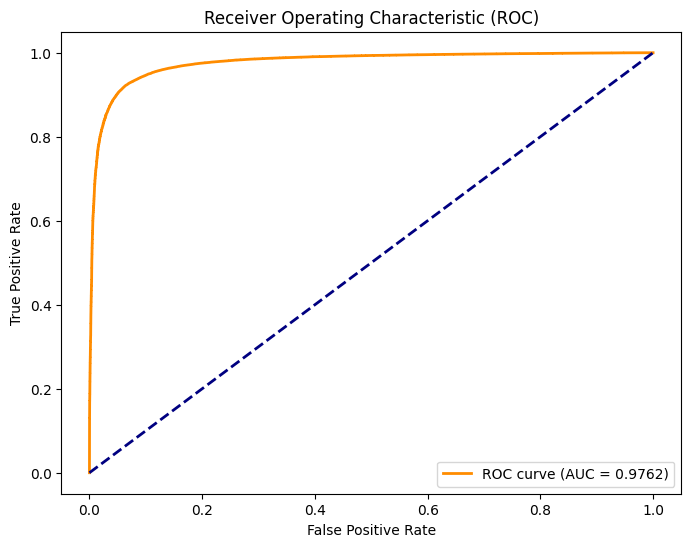

In [110]:
courbe_AUC(best_pipeline3, X_test, y_test)

# CatBoost

In [111]:
import numpy
# import catboost

print(f"Version de numpy : {numpy.__version__}")
# print(f"Version de catboost : {catboost.__version__}")

Version de numpy : 1.26.4


In [112]:
X['City'] = X.groupby('Zip')['City'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))
X['Bank'] = X['Bank'].fillna('Unknown')
X['BankState'] = X['BankState'].fillna(X['State'])

cat_features = ['City', 'State', 'Bank', 'BankState'] 
for col in cat_features:
    X_train[col] = X_train[col].astype(str).fillna('Unknown')
    X_test[col] = X_test[col].astype(str).fillna('Unknown')  # Si tu as un test set


In [113]:
from catboost import CatBoostClassifier

# Modèle de base CatBoost
model_catboost = CatBoostClassifier(n_estimators=600, max_depth=8, learning_rate=0.2, random_state=42)

pipeline4 = creer_pipeline(model_catboost)



In [114]:
# Entraînement du modèle
pipeline4.fit(X_train, y_train)

0:	learn: 0.4903169	total: 207ms	remaining: 2m 3s
1:	learn: 0.3900063	total: 273ms	remaining: 1m 21s
2:	learn: 0.3295929	total: 356ms	remaining: 1m 10s
3:	learn: 0.2963584	total: 429ms	remaining: 1m 3s
4:	learn: 0.2667515	total: 495ms	remaining: 58.9s
5:	learn: 0.2539063	total: 555ms	remaining: 55s
6:	learn: 0.2433507	total: 615ms	remaining: 52.1s
7:	learn: 0.2370462	total: 673ms	remaining: 49.8s
8:	learn: 0.2245562	total: 738ms	remaining: 48.5s
9:	learn: 0.2171351	total: 805ms	remaining: 47.5s
10:	learn: 0.2128869	total: 867ms	remaining: 46.4s
11:	learn: 0.2090189	total: 924ms	remaining: 45.3s
12:	learn: 0.2031027	total: 986ms	remaining: 44.5s
13:	learn: 0.2010050	total: 1.05s	remaining: 43.9s
14:	learn: 0.1985881	total: 1.11s	remaining: 43.3s
15:	learn: 0.1962987	total: 1.17s	remaining: 42.6s
16:	learn: 0.1937851	total: 1.23s	remaining: 42.1s
17:	learn: 0.1917162	total: 1.29s	remaining: 41.7s
18:	learn: 0.1894195	total: 1.36s	remaining: 41.5s
19:	learn: 0.1870409	total: 1.42s	remaini

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('naics_2_nb',
                                                  FunctionTransformer(func=<function transform_naics at 0x0000020D94461120>),
                                                  ['NAICS']),
                                                 ('franchise_transform',
                                                  FunctionTransformer(func=<function transform_franchise at 0x0000020D944DFCE0>),
                                                  ['FranchiseCode']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['ApprovalFY', 'Term',
                                                   'NoEmp', 'CreateJob',
                                                   'RetainedJob',
                                                   'DisbursementGross',
                                                   'GrAppv'])])),
                ('classifier',
                 <catboost.core.CatBoostClassifier object at 0x0000020D839F43E0>)])

In [115]:
metriques(pipeline4, X_test, y_test)


Accuracy Score: 0.9466839666357738

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.85     23673
           1       0.96      0.97      0.97    111202

    accuracy                           0.95    134875
   macro avg       0.91      0.90      0.91    134875
weighted avg       0.95      0.95      0.95    134875

F1-score macro : 0.9066595362860939


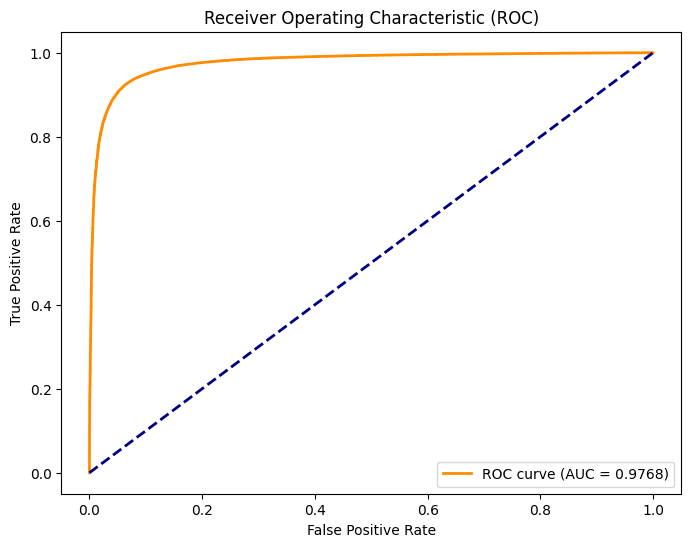

In [116]:
courbe_AUC(pipeline4, X_test, y_test)

## fine tuning catboost :

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostClassifier

# Modèle de base CatBoost
model_catboost_base = CatBoostClassifier(
    random_state=42,
    verbose=50,
)

# Espace de recherche des hyperparamètres
param_distributions = {
    'classifier__depth': [4, 6, 8, 10],                          # Profondeur maximale des arbres
    'classifier__l2_leaf_reg': [1, 3, 5, 7, 10],                # Régularisation L2
    'classifier__border_count': [32, 64, 128],                  # Nombre de seuils pour les variables numériques
    'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2],        # Taux d'apprentissage
    'classifier__iterations': [500, 700, 800],                # Nombre total d'arbres
    'classifier__bagging_temperature': [0, 1, 3, 5],            # Sous-échantillonnage
    'classifier__random_strength': [1, 5, 10],                  # Randomisation des splits
    'classifier__scale_pos_weight': [1, 2, 5],                  # Poids des classes pour gérer le déséquilibre
}

# Pipeline
pipeline = creer_pipeline(model_catboost_base)

# RandomizedSearchCV
random_search_catboost = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=80,  # Nombre d'itérations
    cv=4,       # Validation croisée à 3 plis
    scoring={
        'accuracy': 'accuracy',
        'f1_macro': 'f1_macro',
        'roc_auc': 'roc_auc',
        'precision': 'precision',
        'recall': 'recall',
    },
    refit='f1_macro',  # Optimiser sur le F1-macro
    n_jobs=-1,         # Utiliser tous les cœurs disponibles
    random_state=42,
    verbose=1,
)

In [118]:
random_search_catboost.fit(X_train, y_train)

Fitting 4 folds for each of 80 candidates, totalling 320 fits
0:	learn: 0.6200720	total: 44.4ms	remaining: 35.4s
1:	learn: 0.5403254	total: 136ms	remaining: 54.2s
2:	learn: 0.4781948	total: 203ms	remaining: 53.8s
3:	learn: 0.4262849	total: 294ms	remaining: 58.6s
4:	learn: 0.3945637	total: 385ms	remaining: 1m 1s
5:	learn: 0.3687164	total: 470ms	remaining: 1m 2s
6:	learn: 0.3509821	total: 562ms	remaining: 1m 3s
7:	learn: 0.3342317	total: 646ms	remaining: 1m 3s
8:	learn: 0.3150855	total: 728ms	remaining: 1m 4s
9:	learn: 0.2999042	total: 831ms	remaining: 1m 5s
10:	learn: 0.2877467	total: 939ms	remaining: 1m 7s
11:	learn: 0.2768218	total: 1.04s	remaining: 1m 8s
12:	learn: 0.2675490	total: 1.12s	remaining: 1m 7s
13:	learn: 0.2591308	total: 1.2s	remaining: 1m 7s
14:	learn: 0.2551987	total: 1.29s	remaining: 1m 7s
15:	learn: 0.2493552	total: 1.37s	remaining: 1m 7s
16:	learn: 0.2455592	total: 1.45s	remaining: 1m 6s
17:	learn: 0.2433931	total: 1.53s	remaining: 1m 6s
18:	learn: 0.2402110	total: 1.

RandomizedSearchCV(cv=4,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('naics_2_nb',
                                                                               FunctionTransformer(func=<function transform_naics at 0x0000020D94461120>),
                                                                               ['NAICS']),
                                                                              ('franchise_transform',
                                                                               FunctionTransformer(func=<function transform_franchise at 0x0000020D944DFCE0>),
                                                                               ['FranchiseCode']),
                                                                              ('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                Stan...
                                        'classifier__iterations': [500, 700,
                                                                   800],
                                        'classifier__l2_leaf_reg': [1, 3, 5, 7,
                                                                    10],
                                        'classifier__learning_rate': [0.01,
                                                                      0.05, 0.1,
                                                                      0.2],
                                        'classifier__random_strength': [1, 5,
                                                                        10],
                                        'classifier__scale_pos_weight': [1, 2,
                                                                         5]},
                   random_state=42, refit='f1_macro',
                   scoring={'accuracy': 'accuracy', 'f1_macro': 'f1_macro',
                            'precision': 'precision', 'recall': 'recall',
                            'roc_auc': 'roc_auc'},
                   verbose=1)

In [119]:
cv_scores(random_search_catboost)


moyenne Accuracy: 0.9207055353928315
moyenne F1-macro: 0.8367570228421078
moyenne ROC-AUC: 0.9656883698096159


In [120]:
# Afficher les meilleurs paramètres et scores
best_params_to_csv(random_search_catboost)
print("\nMeilleurs paramètres trouvés:")
for param, value in random_search_catboost.best_params_.items():
    print(f"{param}: {value}")

print("\nMeilleurs scores:")
print(f"F1-macro: {random_search_catboost.best_score_:.3f}")


Meilleurs paramètres trouvés:
classifier__scale_pos_weight: 1
classifier__random_strength: 10
classifier__learning_rate: 0.1
classifier__l2_leaf_reg: 5
classifier__iterations: 800
classifier__depth: 10
classifier__border_count: 128
classifier__bagging_temperature: 0

Meilleurs scores:
F1-macro: 0.905


In [121]:
# Créer le modèle final avec les meilleurs paramètres
meilleurs_params4 = {k.replace('classifier__', ''): v for k, v in random_search_catboost.best_params_.items()}
meilleur_model4 = CatBoostClassifier(
    **meilleurs_params4,
    objective='binary',
    eval_metric=['auc', 'logloss'],
    random_state=42
)

# Créer la pipeline finale
best_pipeline4 = creer_pipeline(meilleur_model3)


In [ ]:
best_pipeline4.fit(X_train, y_train)    

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=0.2, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.2
[LightGBM] [Warning] lambda_l1 is set=0.75, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.75
[LightGBM] [Warning] lambda_l2 is set=1.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Cur

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('naics_2_nb',
                                                  FunctionTransformer(func=<function transform_naics at 0x0000020D94461120>),
                                                  ['NAICS']),
                                                 ('franchise_transform',
                                                  FunctionTransformer(func=<function transform_franchise at 0x0000020D944DFCE0>),
                                                  ['FranchiseCode']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['ApprovalFY', 'Ter...
                                                   'RetainedJob',
                                                   'DisbursementGross',
                                                   'GrAppv'])])),
                ('classifier',
                 LGBMClassifier(bagging_fraction=0.8, bagging_freq=10,
                                eval_metric=['auc', 'logloss'],
                                feature_fraction=0.8, lambda_l1=0.75,
                                lambda_l2=1.0,
                                learning_rate=0.25118864315095796, max_bin=510,
                                max_depth=4, min_data_in_leaf=10,
                                min_gain_to_split=0.2, n_estimators=500,
                                num_leaves=20, objective='binary',
                                random_state=42))])

In [123]:
metriques(best_pipeline4, X_test, y_test)

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=0.2, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.2
[LightGBM] [Warning] lambda_l1 is set=0.75, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.75
[LightGBM] [Warning] lambda_l2 is set=1.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
Accuracy Score: 0.9453790546802595

Classification Report:
              precision    recall  f1-score   support

           0       0.86     

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=0.2, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.2
[LightGBM] [Warning] lambda_l1 is set=0.75, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.75
[LightGBM] [Warning] lambda_l2 is set=1.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10


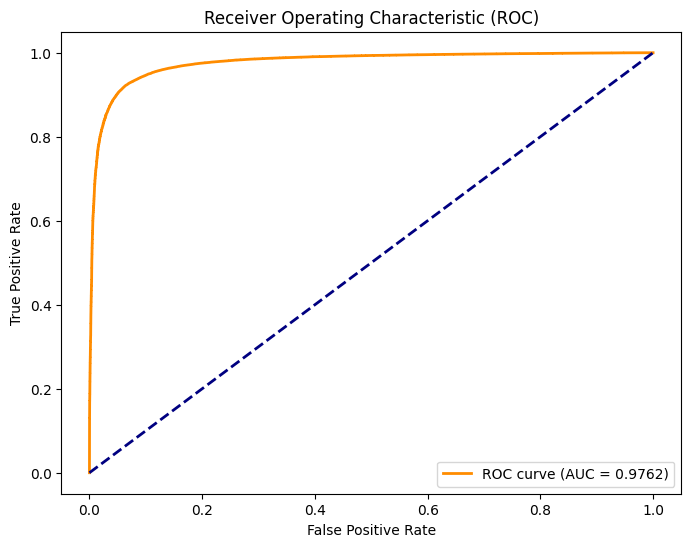

In [124]:
courbe_AUC(best_pipeline4, X_test, y_test)

In [126]:
df_nettoye.to_csv("dataframe_nettoye.csv", index=False)
